In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.utils import QuantumInstance
from qiskit_ionq import IonQProvider
from qiskit.extensions import UnitaryGate


In [16]:
ionq_provider = IonQProvider('r4o7WWWCZetVsf6TgrZ95PAF4PcpATmx')
ionq_provider.backends()
aer_backend = Aer.get_backend("aer_simulator")
ionq_backend_sim = ionq_provider.get_backend('ionq_simulator') 
ionq_backend= ionq_provider.get_backend('ionq_qpu')

In [3]:

ionq_provider.backends()

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]

# Task 7

4


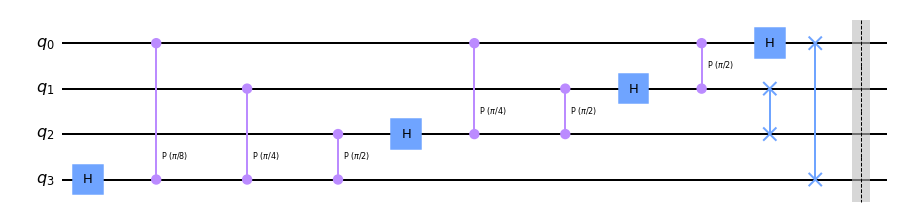

In [11]:
def qft_rot(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rot(circuit, n)
    
def swap_registers(circuit, n):
    print(n)
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rot(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.barrier()
qc.draw('mpl')


In [20]:
qc = QuantumCircuit(4,4)
qc.z(range(4))
qft(qc,4)
qc.barrier()
qc.measure_all()
qc.draw('mpl')
aer_qc=transpile(qc,aer_backend)
ionqsim_qc=transpile(qc,ionq_backend_sim)
ionq_qc=transpile(qc,ionq_backend)

shots=5000
aer_obj = assemble(aer_qc, shots=shots)




job_aer = aer_backend.run(aer_obj)
job_ionqsim=ionq_backend_sim.run(ionqsim_qc)
job_ionq=ionq_backend.run(ionq_qc)




4


In [21]:
aer_result=job_aer.result()
ionqsim_result=job_ionqsim.result()
ionq_result=job_ionq.result()

In [25]:
aer_pros = aer_result.get_counts()
ionqsim_pros=ionqsim_result.get_counts()
ionq_pros=ionq_result.get_counts()

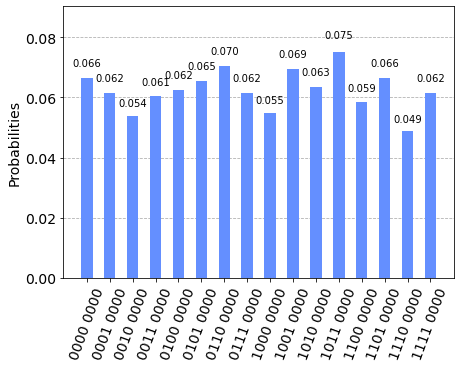

In [28]:
from qiskit.visualization import plot_histogram
plot_histogram(aer_pros)



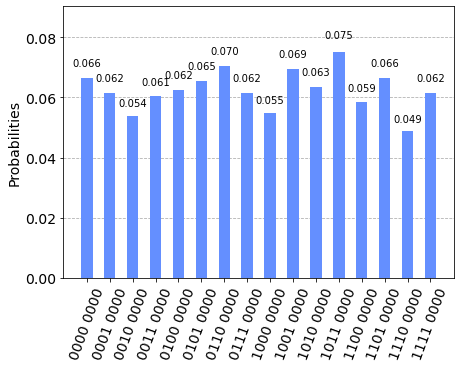

In [29]:
plot_histogram(ionqsim_pros)

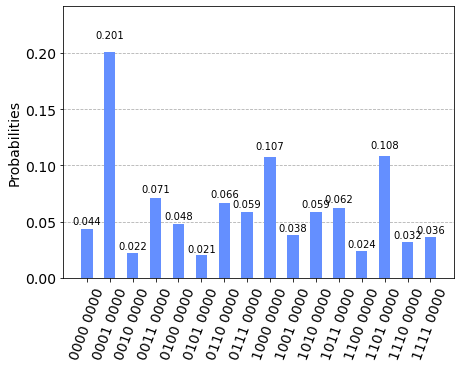

In [30]:
plot_histogram(ionq_pros)

# Task 8

In [ ]:

def QPE(circuit, n, m, U):
    Ugate=UnitaryGate(U)
    